In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Velocity Profile distribution

## Input parameters

Means:

In [2]:
logmean = pd.Series()
logmean['a'] = np.log10(10.0)
logmean['r'] = np.log10(10.0)
logmean['mu'] = np.log10(10.0)
logmean['kappa'] = np.log10(10.0)

Log std:

In [3]:
logstd = pd.Series()
logstd['a'] = 2.0 / np.sqrt(12)
logstd['r'] = 2.0 / np.sqrt(12)
logstd['mu'] = 2.0 / np.sqrt(12)
logstd['kappa'] = 2.0 / np.sqrt(12)

## Sample

In [4]:
N = 10000

In [5]:
low = logmean - np.sqrt(12) / 2.0 * logstd
high = logmean + np.sqrt(12) / 2.0 * logstd

In [6]:
np.random.seed(42)
logsamples = pd.DataFrame(np.random.uniform(low, high, (N, len(low))), columns=logmean.index)
samples = 10**logsamples

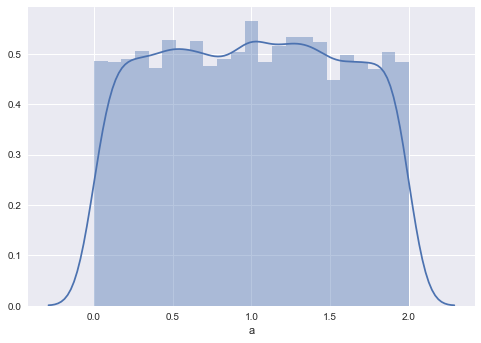

In [7]:
sns.distplot(logsamples['a'])
plt.show()

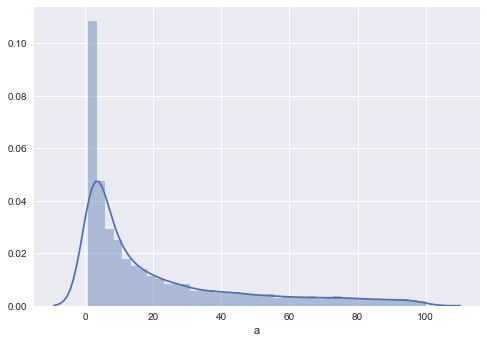

In [8]:
sns.distplot(samples['a'])
plt.show()

In [9]:
samples.mean()

a        21.233742
r        21.322899
mu       21.347665
kappa    21.731657
dtype: float64

## calculate velocity

In [10]:
def M(a, r, mu, kappa):
    return 16 * kappa * mu / (a**3 * r**3)

In [11]:
def v(samples, c=1, x=1, L=1):
    a, r, mu, kappa = samples['a'], samples['r'], samples['mu'], samples['kappa']
    f1 = c * a**2 * r**2  / mu
    f2 = np.sqrt(M(a, r, mu, kappa))
    f3 = np.sinh(np.sqrt(M(a, r, mu, kappa) * x)) / np.cosh(np.sqrt(M(a, r, mu, kappa) * L))
    return f1 * f2 * f3

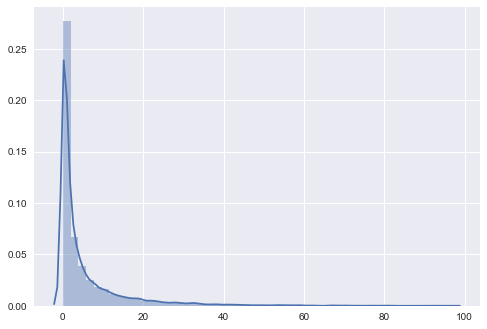

In [12]:
sns.distplot(v(samples))
plt.show()

Velocity for mean parameters:

In [13]:
v(samples.mean())

0.76794209331804852

Mean velocity and standard deviaton

In [14]:
v(samples).mean()

5.6055988763912881

In [15]:
v(samples).std()

9.8726819398899259